In [5]:
import scanpy as sc
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


# Step 1: Filtering

... storing 'feature_types' as categorical
... storing 'genome' as categorical


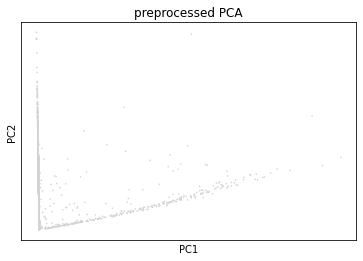

In [2]:
#pca before filtering
sc.tl.pca(adata)
sc.pl.pca(adata,title="preprocessed PCA")

In [4]:
processed_adata = sc.pp.recipe_zheng17(adata,copy=True)

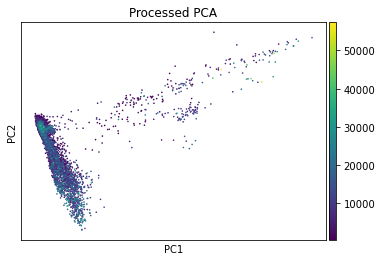

In [7]:
pca=sc.tl.pca(processed_adata,copy=True)
sc.pl.pca(pca,title="Processed PCA",color='n_counts_all')

# Step 2: Clustering

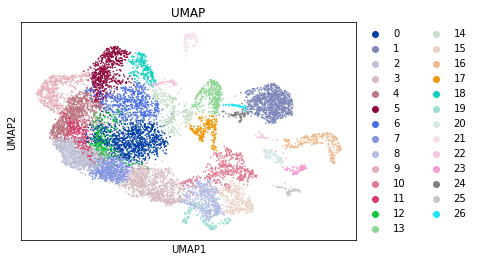

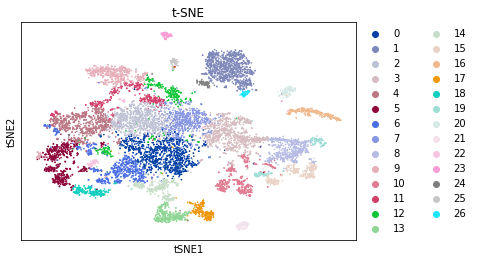

In [9]:
# Clustering
sc.pp.neighbors(pca, n_neighbors=10, n_pcs=40)
sc.tl.leiden(pca)

sc.tl.umap(pca)
sc.pl.umap(pca,color='leiden',use_raw=False, title='UMAP')
sc.tl.tsne(pca)
sc.pl.tsne(pca, color='leiden',use_raw=False, title='t-SNE')

# Step 3: Distinguishing genes

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


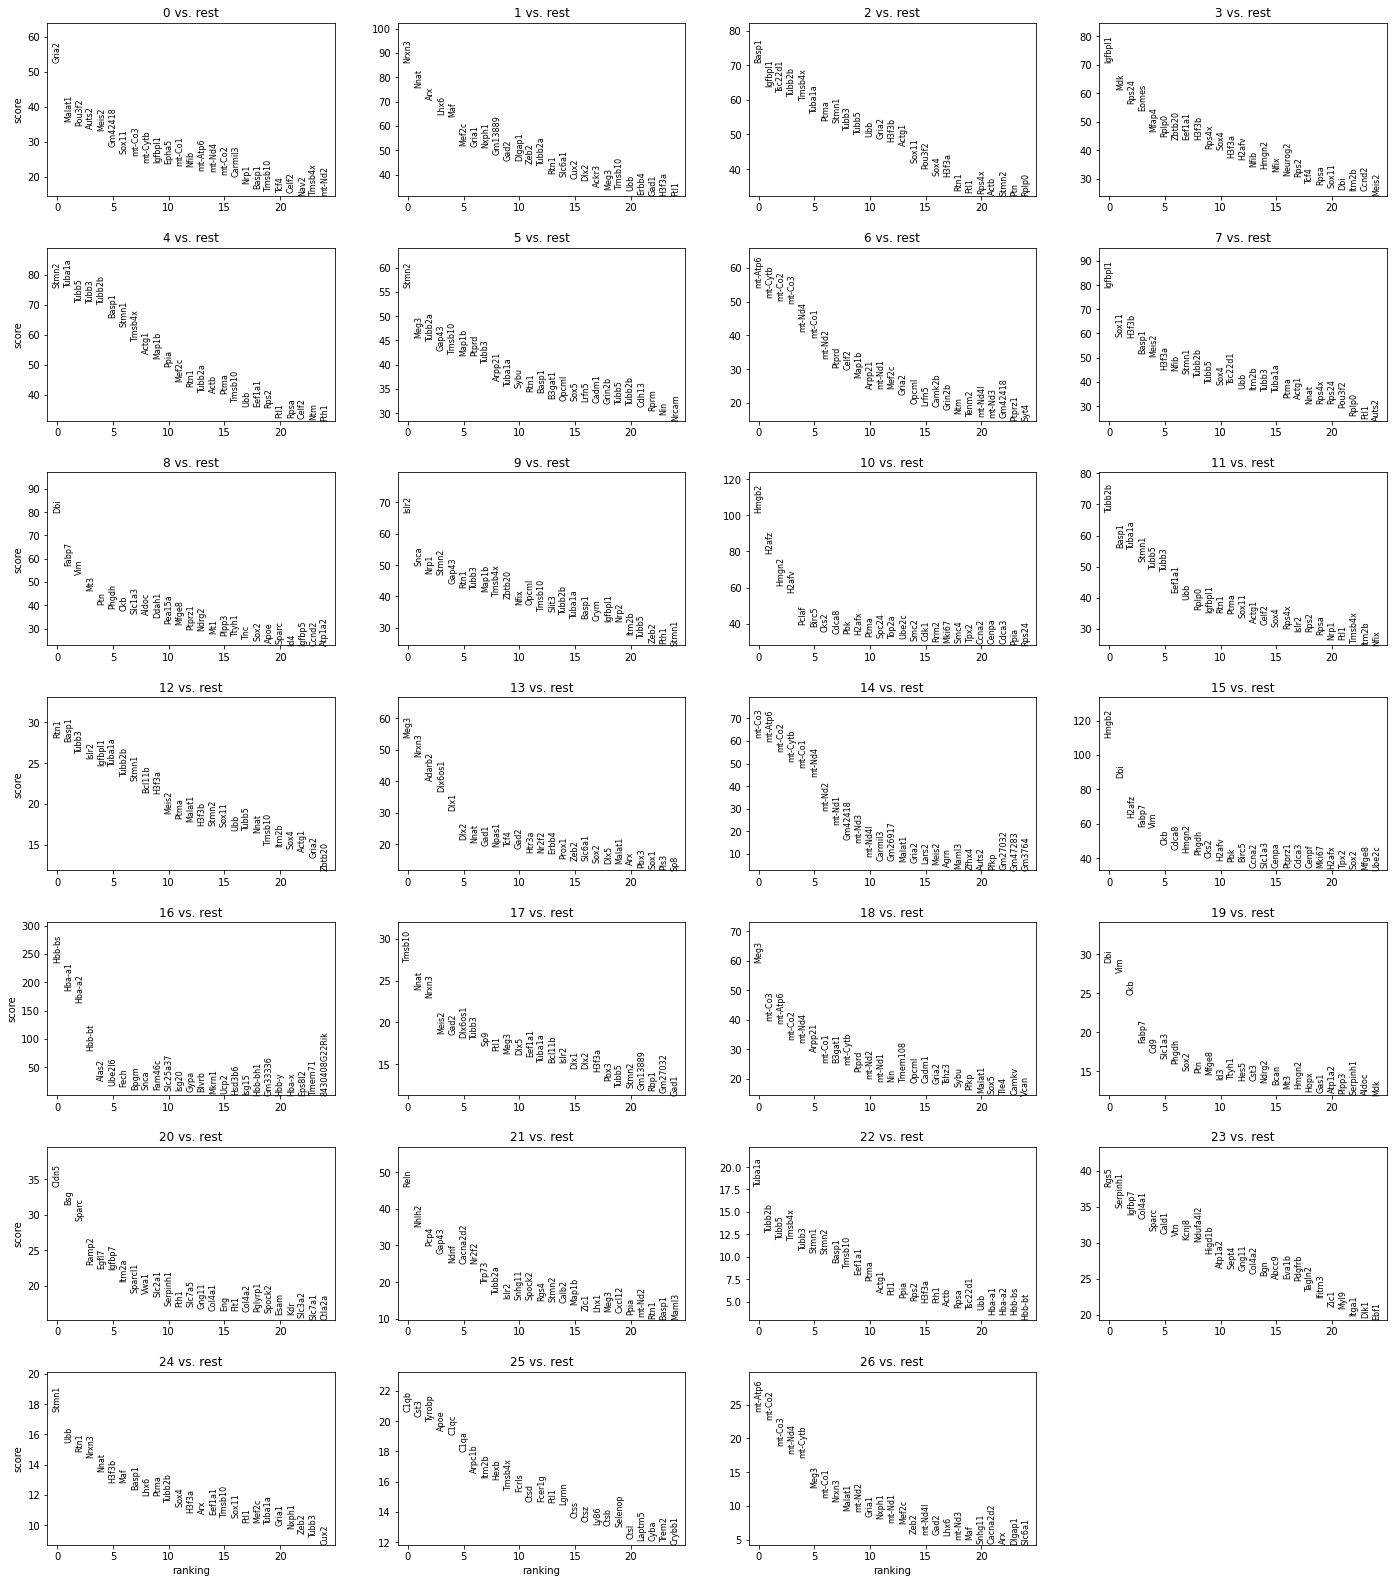

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


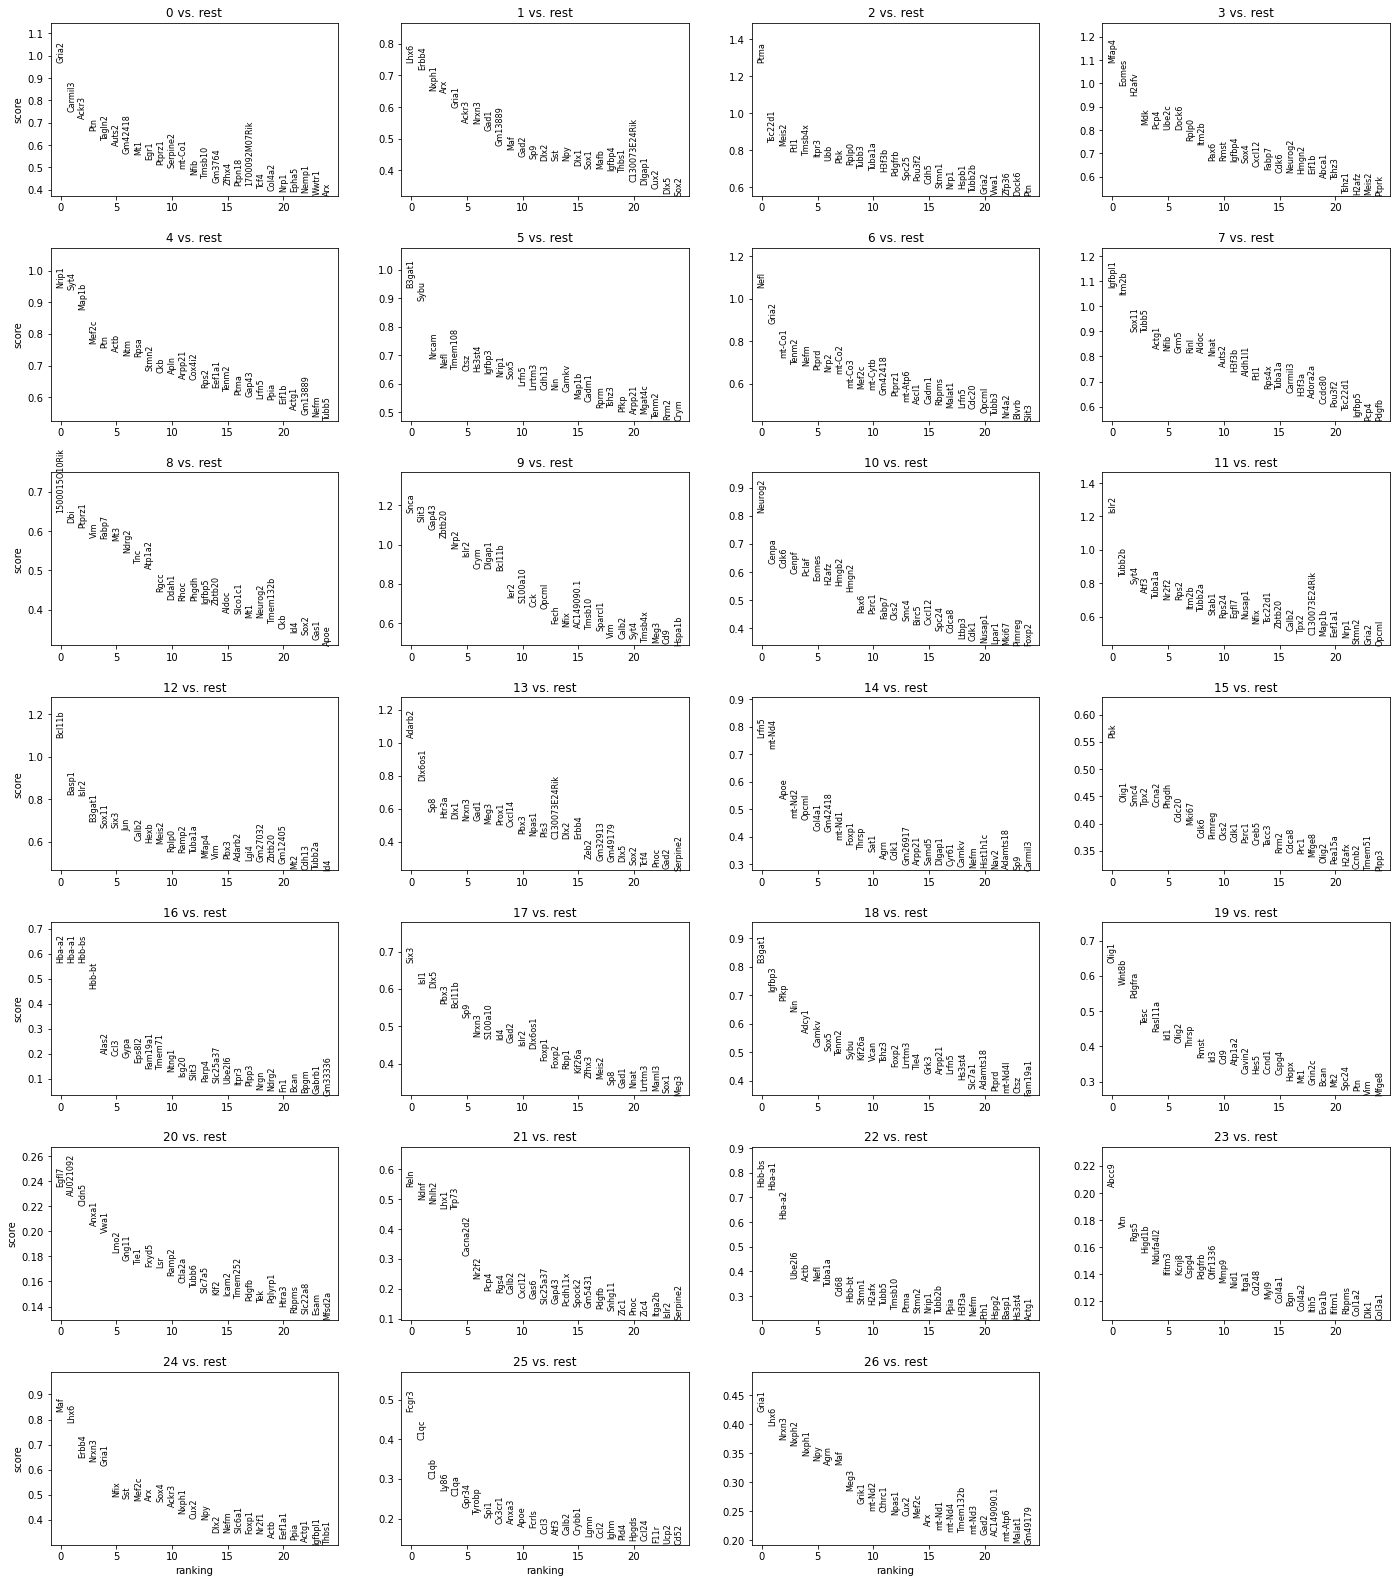

In [10]:
sc.tl.rank_genes_groups(pca, 'leiden', method='t-test')
sc.pl.rank_genes_groups(pca, n_genes=25, sharey=False)
pca.write("t-test.csv")

sc.tl.rank_genes_groups(pca, 'leiden', method='logreg')
sc.pl.rank_genes_groups(pca, n_genes=25, sharey=False)
pca.write("logistic.csv")

# Step 4: Cell types?

Notch1 = neuroepithelial, Hes5 = Radial glia, Ascl1 = Intermediate progenitor, Gap43 = Schwann, Lhx6 = Cerebellum , Egf17 = Horizontal, Sybu = Ito, C1qb = Monocyte

In [60]:
# Test if gene is in database
'Cd40' in adata.var_names

True

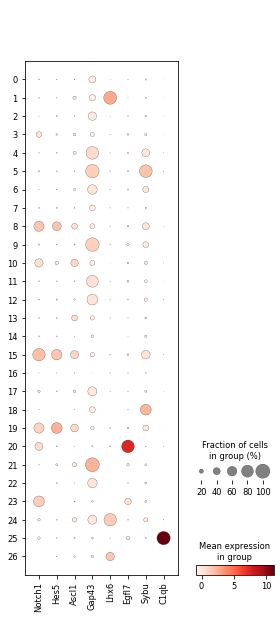

In [64]:
#Testing out some of the top marker genes for uniqueness 
marker_genes=["Notch1","Hes5","Ascl1","Gap43","Lhx6","Egfl7","Sybu","C1qb"]
sc.pl.dotplot(pca, marker_genes, groupby='leiden')

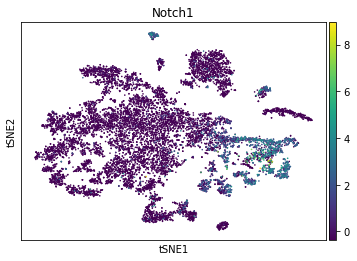

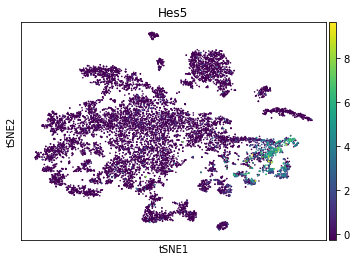

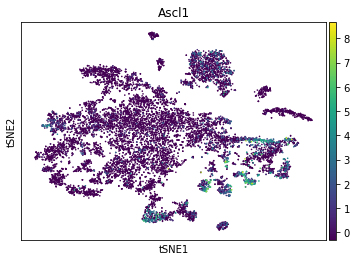

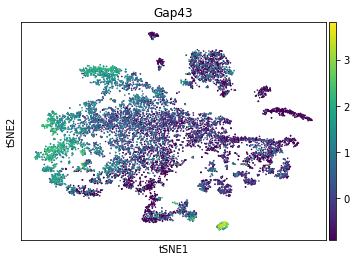

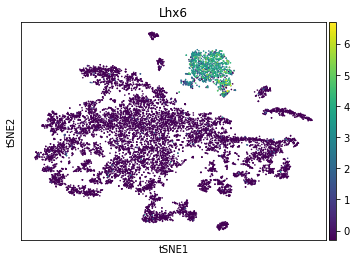

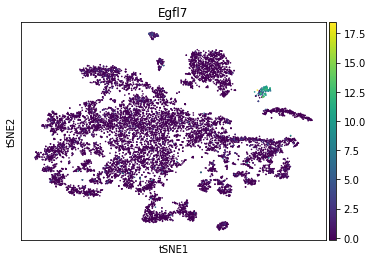

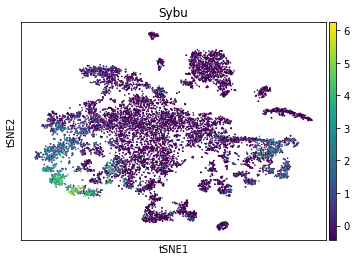

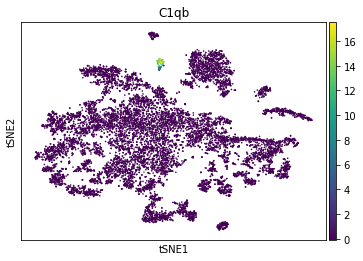

In [65]:
#supporting tSNE for each gene that we examined earlier 
for gene in marker_genes:
    sc.pl.tsne(pca, color=gene,use_raw=False, title=gene)

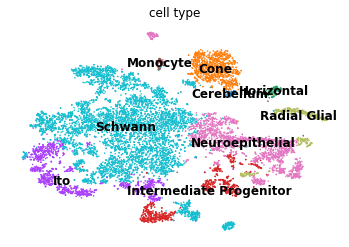

In [76]:
cluster2annotation = {
    '0': 'Schwann',
    '1': 'Cone',
    '2': 'Schwann',
    '3': 'Neuroepithelial',
    '4': 'Schwann',
    '5': 'Ito',
    '6': 'Schwann',
    '7': 'Schwann',
    '8': 'Neuroepithelial',
    '9': 'Schwann',
    '10': 'Intermediate Progenitor',
    '11': 'Schwann',
    '12': 'Schwann',
    '13': 'Intermediate Progenitor',
    '14': 'Ito',
    '15': 'Neuroepithelial',
    '16': 'Radial Glial',
    '17': 'Schwann',
    '18': 'Ito',
    '19': 'Radial Glial',
    '20': 'Horizontal',
    '21': 'Schwann',
    '22': 'Schwann',
    '23': 'Neuroepithelial',
    '24': 'Schwann',
    '25': 'Monocyte',
    '26': 'Cerebellum',
}
pca.obs['cell type'] = pca.obs['leiden'].map(cluster2annotation).astype('category')
sc.pl.tsne(pca, color='cell type', legend_loc='on data', frameon=False, legend_fontsize=12, size = 10)